/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly impr

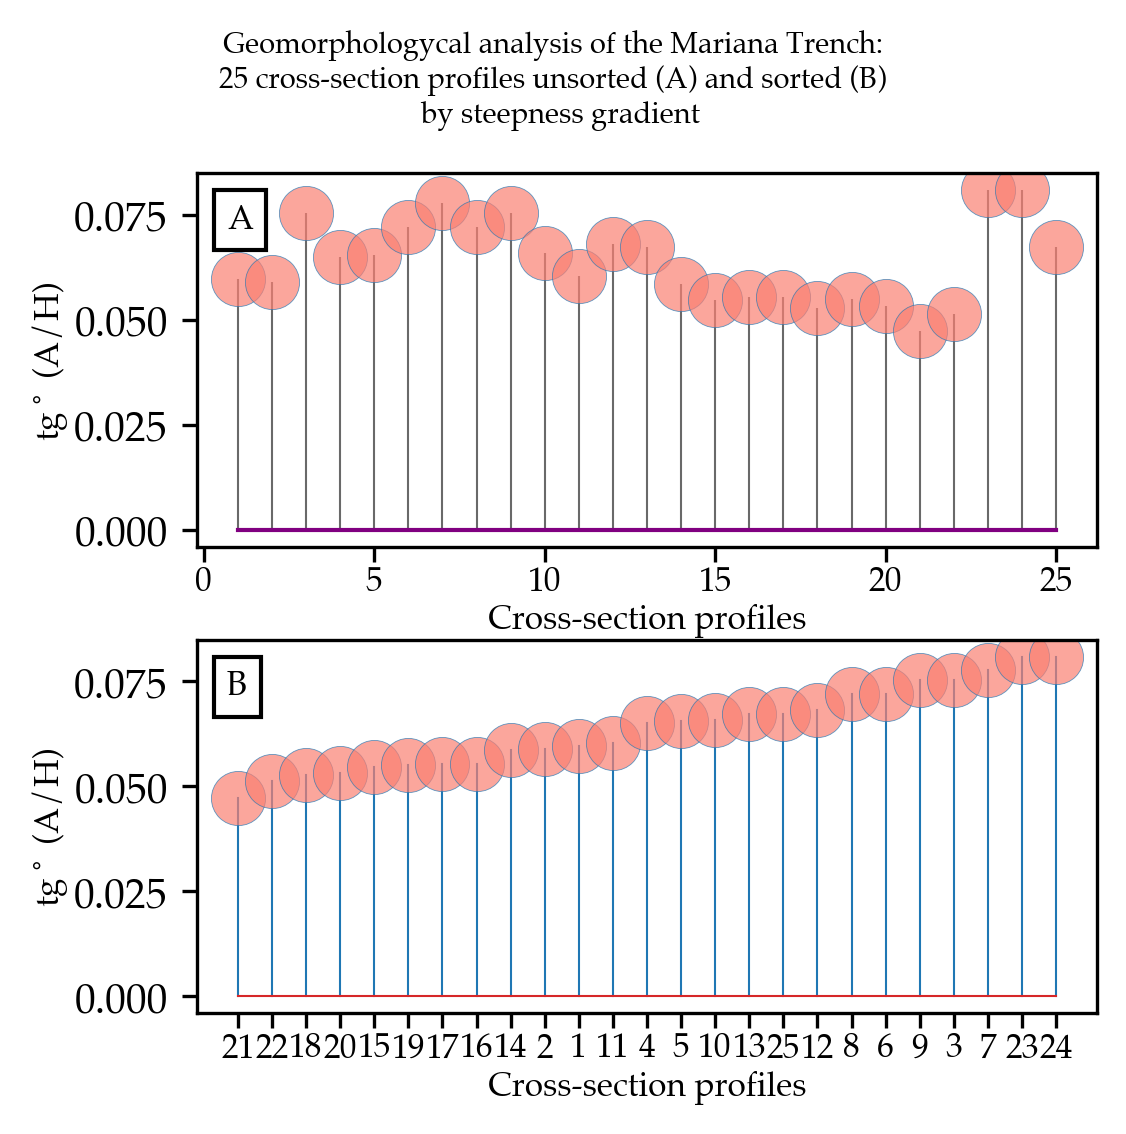

In [24]:
#!/usr/bin/env python
# coding: utf-8
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.artist as martist
from matplotlib.offsetbox import AnchoredText
import pylab as plt

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")

params = {'figure.figsize': (4, 4),
          'figure.dpi': 300,
          'font.family': 'Palatino', 
          'axes.labelsize': 8,
          'xtick.labelsize': 8,
          'axes.labelpad': 1,
          'lines.markerfacecolor': 'salmon',
          'lines.markeredgewidth': .2,
          'lines.markersize': 13,
          'lines.linewidth': .5,
          'figure.titlesize': 7,
          'figure.constrained_layout.w_pad': 0.04167
         }
pylab.rcParams.update(params)

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

# define figure
fig = plt.figure()
fig.suptitle('Geomorphologycal analysis of the Mariana Trench: \n25 cross-section profiles unsorted (A) and sorted (B) \n by steepness gradient', 
             x=0.5, y=0.97)

# subplot 1
plt.subplot(2, 1, 1)
ax1 = fig.add_subplot(211)
x = df.profile
values = df.tg_angle
markerline, stemlines, baseline = plt.stem(x, values, markerfmt="o", 
                                           basefmt='-', use_line_collection=True)
plt.setp(markerline, alpha=0.7)  
plt.setp(stemlines, color='dimgray')
plt.setp(baseline, color='purple', linewidth=1)
plt.xlabel('Cross-section profiles')
plt.ylabel('tg$^\circ$ (A/H)')
add_at(ax1, "A")

# subplot 2
plt.subplot(2, 1, 2)
ax2 = fig.add_subplot(212)
df = pd.DataFrame({'group':df.profile, 'values':df.tg_angle})
ordered_df = df.sort_values(by='values')
markerline, stemlines, baseline = plt.stem(x, ordered_df['values'])
plt.setp(markerline, alpha=0.7) 
plt.xticks(x, ordered_df['group'])
plt.xlabel('Cross-section profiles')
plt.ylabel('tg$^\circ$ (A/H)')
add_at(ax2, "B")

# visualizing
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15,
                    left=0.20, right=0.95,
                    hspace=0.25, wspace=2.8
                    )
plt.savefig('plot_Stems.png')
plt.show()